In [2]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 4.9 MB/s 
     |████████████████████████████████| 9.8 MB 42.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [4]:
#importing libraries
import seaborn as sns
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing

In [5]:
import pandas as pd
df_train_label=pd.read_csv('/content/drive/MyDrive/self case study 1/train labels.csv')
df_train_var=pd.read_csv('/content/drive/MyDrive/self case study 1/train variables.csv')
df=df_train_var.merge(df_train_label)

In [12]:
df_test=pd.read_csv('/content/702ddfc5-68cd-4d1d-a0de-f5f566f76d91.csv')
df_test.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


# 2. Feature Selection- With Correlation

https://github.com/krishnaik06/Complete-Feature-Selection/blob/master/2-Feature%20Selection-%20Correlation.ipynb

In [28]:
df3_numerical_features=df[['amount_tsh','gps_height','longitude','latitude','num_private','region_code','district_code','population']]

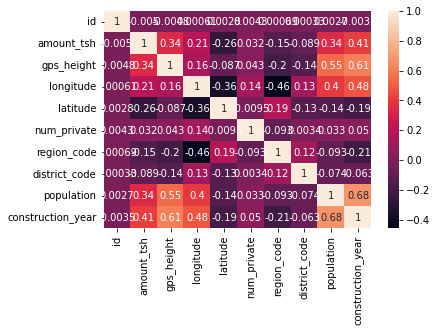

In [29]:
corr = df.corr(method = 'spearman')

sns.heatmap(corr, annot = True)

plt.show()

In [30]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr(method = 'spearman')
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [31]:
corr_features = correlation(df3_numerical_features, 0.6)
len(set(corr_features))

0

In [32]:
corr_features

set()

# 2.1 Remove less impacted and high correlation features

In [33]:
#https://www.geeksforgeeks.org/union-function-python/
print(set(df.quantity.unique())),print(set(df.quantity_group.unique()))

{'enough', 'insufficient', 'seasonal', 'dry', 'unknown'}
{'enough', 'insufficient', 'seasonal', 'dry', 'unknown'}


(None, None)

In [34]:
#quantity is highly correlated with quantity_group

Both features quantity and quantity_group have almost 100 percentage commonality Hence it is recommended to remove any one of the feature

In [35]:
#https://www.geeksforgeeks.org/union-function-python/
print(set(df.source_type.unique())),print(set(df.source.unique()))

{'shallow well', 'borehole', 'rainwater harvesting', 'dam', 'other', 'spring', 'river/lake'}
{'shallow well', 'lake', 'rainwater harvesting', 'hand dtw', 'dam', 'machine dbh', 'river', 'other', 'spring', 'unknown'}


(None, None)

All types of source_type are present in source feature hence its recommended to remove any one of the feature

In [36]:
#https://www.geeksforgeeks.org/union-function-python/
print(set(df.payment_type.unique())),print(set(df.payment.unique()))

{'monthly', 'never pay', 'per bucket', 'other', 'annually', 'on failure', 'unknown'}
{'pay per bucket', 'pay when scheme fails', 'never pay', 'pay annually', 'other', 'pay monthly', 'unknown'}


(None, None)

As both payment and payment_type carries the similar information hence its recommended to remove any one of the feature

In [37]:
#https://www.geeksforgeeks.org/union-function-python/
print(set(df.waterpoint_type_group.unique())),print(set(df.waterpoint_type.unique()))

{'hand pump', 'cattle trough', 'communal standpipe', 'improved spring', 'dam', 'other'}
{'hand pump', 'cattle trough', 'communal standpipe', 'communal standpipe multiple', 'improved spring', 'dam', 'other'}


(None, None)

Both waterpoint type group and water point type have almost carrying the similar information hence its recommended to remove one feature

In [38]:
#https://www.geeksforgeeks.org/union-function-python/
print(set(df.extraction_type_group.unique())),print(set(df.extraction_type.unique()))

{'afridev', 'submersible', 'other motorpump', 'india mark iii', 'mono', 'nira/tanira', 'swn 80', 'india mark ii', 'wind-powered', 'gravity', 'other handpump', 'other', 'rope pump'}
{'afridev', 'submersible', 'ksb', 'other - play pump', 'india mark iii', 'mono', 'nira/tanira', 'swn 80', 'india mark ii', 'windmill', 'other - swn 81', 'climax', 'other - mkulima/shinyanga', 'gravity', 'walimi', 'other', 'cemo', 'other - rope pump'}


(None, None)

Both extraction_type_group and extraction_type_group have almost carrying the similar information hence its recommended to remove one feature

scheme name almost 47 % of null values hence we can remove the feature

97% values of num_private feature having 0 values hence it does not useful in predicting the class label hence it is recommended to delete this feature

# Forward feature selection

In [173]:
#
# Train/test split
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le=le.fit(df.status_group)
[(le.classes_)]
y=le.transform(df['status_group'])

X_train, X_test, y_train, y_test = train_test_split(
    df_new,
    y,
    test_size=0.25,
    random_state=42)

y_train = y_train.ravel()
y_test = y_test.ravel()

print('Training dataset shape:', X_train.shape, y_train.shape)
print('Testing dataset shape:', X_test.shape, y_test.shape)

Training dataset shape: (44550, 7) (44550,)
Testing dataset shape: (14850, 7) (14850,)


In [84]:
# Build RF classifier to use in feature selection
clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)

# Build step forward feature selection
sfs1 = sfs(clf,
           k_features=7,
           forward=True,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  1.7min finished

[2022-10-28 07:34:11] Features: 1/7 -- score: 0.571986531986532[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.3min finished

[2022-10-28 07:35:31] Features: 2/7 -- score: 0.6059932659932661[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.2min finished

[2022-10-28 07:36:42] Features: 3/7 -- score: 0.6397081930415264[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 o

BY using forward features selection we have keep numerical features as same since the model performance was high by keeping all features which was having a score of 69

In [94]:
df.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

Mutual_info feature selection

In [167]:
df_mlm=df[['funder', 
       'installer',  'wpt_name',
       'basin', 'subvillage', 'region', 'lga',
       'ward', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group',]]

In [ ]:
# Combining all the above stundents 
from tqdm import tqdm
def preprocess_text(df,col):
    preprocessed_text = []
    # tqdm is for printing the status bar
    df[col] = df[col] .str.replace('/', ' ')
    df[col] = df[col].str.lower()
    df[col] = df[col].str.replace(',','')
    df[col] = df[col].str.replace('.','')
    df[col] = df[col].fillna('unknown')
    return df[col] 

In [97]:
df_mlm['region'] = df_mlm['region'].fillna('unknown')
df_mlm['lga']=df_mlm['lga'].fillna('unknown')
df_mlm['ward']=df_mlm['ward'].fillna('unknown')
df_mlm['public_meeting']=df_mlm['public_meeting'].fillna('unknown')
df_mlm['recorded_by']=df_mlm['recorded_by'].fillna('unknown')

df_mlm['scheme_name']=df_mlm['scheme_name'].fillna('unknown')
df_mlm['permit']=df_mlm['permit'].fillna('unknown')
df_mlm['extraction_type']=df_mlm['extraction_type'].fillna('unknown')

df_mlm['extraction_type_group']=df_mlm['extraction_type_group'].fillna('unknown')
df_mlm['extraction_type_class']=df_mlm['extraction_type_class'].fillna('unknown')
df_mlm['management']=df_mlm['management'].fillna('unknown')

df_mlm['management_group']=df_mlm['management_group'].fillna('unknown')
df_mlm['water_quality']=df_mlm['water_quality'].fillna('unknown')
df_mlm['quality_group']=df_mlm['quality_group'].fillna('unknown')

In [96]:
df_mlm['funder'] = df_mlm['funder'].fillna('unknown')
df_mlm['installer']=df_mlm['installer'].fillna('unknown')
df_mlm['subvillage']=df_mlm['subvillage'].fillna('unknown')
df_mlm['public_meeting']=df_mlm['public_meeting'].fillna('unknown')
df_mlm['scheme_management']=df_mlm['scheme_management'].fillna('unknown')



In [94]:
df_mlm['region'] = preprocess_text(df_mlm,'region')
df_mlm['lga']=preprocess_text(df_mlm,'lga')
df_mlm['ward']=preprocess_text(df_mlm,'ward')
df_mlm['public_meeting']=preprocess_text(df_mlm,'public_meeting')
df_mlm['recorded_by']=preprocess_text(df_mlm,'recorded_by')

df_mlm['scheme_name']=preprocess_text(df_mlm,'scheme_name')
#df_mlm['permit']=preprocess_text(df_mlm,'permit')
df_mlm['extraction_type']=preprocess_text(df_mlm,'extraction_type')

df_mlm['extraction_type_group']=preprocess_text(df_mlm,'extraction_type_group')
df_mlm['extraction_type_class']=preprocess_text(df_mlm,'extraction_type_class')
df_mlm['management']=preprocess_text(df_mlm,'management')

df_mlm['management_group']=preprocess_text(df_mlm,'management_group')
df_mlm['water_quality']=preprocess_text(df_mlm,'water_quality')
df_mlm['quality_group']=preprocess_text(df_mlm,'quality_group')

In [95]:

df_mlm['funder'] = preprocess_text(df_mlm,'funder')
df_mlm['installer']=preprocess_text(df_mlm,'installer')
df_mlm['subvillage']=preprocess_text(df_mlm,'subvillage')
df_mlm['public_meeting']=preprocess_text(df_mlm,'public_meeting')
df_mlm['scheme_management']=preprocess_text(df_mlm,'scheme_management')

# mutual information for categorical feature selection

# Model Built Using All Features

In [116]:
#https://stackoverflow.com/questions/64969066/how-to-silence-sklearn-warning-on-logistic-regression
# evaluation of a model using all input features
#https://www.rasgoml.com/feature-engineering-tutorials/feature-selection-using-mutual-information-in-scikit-learn
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
 
# load the dataset
def load_dataset(df_mlm):
	# load the dataset as a pandas DataFrame
	# retrieve numpy array
	dataset = df_mlm.values
	# split into input (X) and output (y) variables
	X = dataset[:, :-1]
	y = df['status_group']
	# format all fields as string
	X = X.astype(str)
	return X, y
 
# prepare input data
def prepare_inputs(X_train, X_test):
	oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc
 
# prepare target
# prepare target
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc
 
# load the dataset
# load the dataset
X, y = load_dataset(df_mlm)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# fit the model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_enc, y_train_enc)
# evaluate the model
yhat = model.predict(X_test_enc)
# evaluate predictions
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 53.53


In [117]:
X_train_enc.shape, X_test_enc.shape,y_train_enc.shape, y_test_enc.shape

((47520, 28), (11880, 28), (47520,), (11880,))

if you consider k=all then tha accuracy of model on test data was 53.53

# observed performance with different set of features

In [118]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
def select_features1(X_train, y_train, X_test,value):
	fs = SelectKBest(score_func=mutual_info_classif, k=value)
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

In [119]:
#https://stackoverflow.com/questions/64969066/how-to-silence-sklearn-warning-on-logistic-regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from warnings import simplefilter
list=[]
accuracy_list=[]
# ignore all warnings
simplefilter(action='ignore')
for i in range(20,28):
  X_train_fs, X_test_fs, fs = select_features1(X_train_enc, y_train_enc, X_test_enc,value=i)
  # fit the model
  model = LogisticRegression()
  model.fit(X_train_fs, y_train_enc)
  # evaluate the model
  yhat = model.predict(X_test_fs)
  # evaluate predictions
  print(i,'faetures')
  accuracy = accuracy_score(y_test_enc, yhat)
  print('Accuracy: %.2f' % (accuracy*100))
  list.append(i)
  accuracy_list.append(accuracy)

20 faetures
Accuracy: 53.13
21 faetures
Accuracy: 53.40
22 faetures
Accuracy: 53.47
23 faetures
Accuracy: 52.95
24 faetures
Accuracy: 53.64
25 faetures
Accuracy: 53.55
26 faetures
Accuracy: 52.92
27 faetures
Accuracy: 53.53


if you consider k=24 then tha accuracy of model on test data was 53.64 which

 was higher than all features

In [121]:
X_train_fs, X_test_fs, fs = select_features1(X_train_enc, y_train_enc, X_test_enc,value=24)
# fit the model
model1 = LogisticRegression()
model1.fit(X_train_fs, y_train_enc)
# evaluate the model
yhat = model1.predict(X_test_fs)
# evaluate predictions
print(24,'faetures')
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy: %.2f' % (accuracy*100))

24 faetures
Accuracy: 53.64


Feature 0: 0.095888
Feature 1: 0.096367
Feature 2: 0.034656
Feature 3: 0.016474
Feature 4: 0.114839
Feature 5: 0.039490
Feature 6: 0.091484
Feature 7: 0.182308
Feature 8: 0.006480
Feature 9: 0.000000
Feature 10: 0.019726
Feature 11: 0.144192
Feature 12: 0.005029
Feature 13: 0.063807
Feature 14: 0.061049
Feature 15: 0.063944
Feature 16: 0.018979
Feature 17: 0.006880
Feature 18: 0.041903
Feature 19: 0.034976
Feature 20: 0.020261
Feature 21: 0.023949
Feature 22: 0.106049
Feature 23: 0.107303
Feature 24: 0.023876
Feature 25: 0.021046
Feature 26: 0.004439
Feature 27: 0.065669


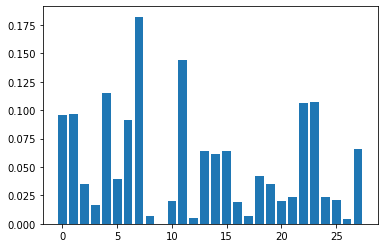

In [123]:
# what are scores for the features
from matplotlib import pyplot
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [127]:
dict={}
for i in range(len(fs.scores_)):
  dict[i]=fs.scores_[i]


In [130]:

from collections import OrderedDict
d_descending = OrderedDict(sorted(dict.items(), 
                                  key=lambda kv: kv[1], reverse=True))

In [136]:

count=0
imp_list=[]
for i,j in d_descending.items():
  count+=1
  imp_list.append(i)
  if count==24:
    break

In [138]:
imp_list

24

In [155]:
imp_feat=[]
for i in imp_list:
  pos = i
  colname = df_mlm.columns[pos]
  imp_feat.append(colname)

In [168]:
imp_feat


['ward',
 'scheme_name',
 'subvillage',
 'quantity_group',
 'quantity',
 'installer',
 'funder',
 'lga',
 'waterpoint_type',
 'extraction_type_class',
 'extraction_type',
 'extraction_type_group',
 'payment',
 'region',
 'payment_type',
 'wpt_name',
 'quality_group',
 'source',
 'source_type',
 'water_quality',
 'scheme_management',
 'management',
 'basin',
 'management_group']

Above top 24 features were included according to their performance and remaining features were removed

In [169]:
for i in df_mlm.columns:
  if i not in imp_feat:
    print(i)

public_meeting
recorded_by
source_class
waterpoint_type_group


The above features we can drop so dimensionality reduces

# PCA 

In [172]:
#https://towardsdatascience.com/how-to-select-the-best-number-of-principal-components-for-the-dataset-287e64b14c6d
#https://www.datasklr.com/principal-component-analysis-and-factor-analysis/principal-component-analysis********************
#https://towardsdatascience.com/feature-extraction-using-principal-component-analysis-a-simplified-visual-demo-e5592ced100a
#https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
#https://sanchitamangale12.medium.com/scree-plot-733ed72c8608
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

df.gps_height=df.gps_height.where(df.gps_height< 0, df.gps_height.mean())
df.population=df.population.replace(0,df.population.mean())
df.amount_tsh=df.amount_tsh.replace(0,df.amount_tsh.median())

df_new=df[['amount_tsh','gps_height','longitude','latitude','region_code','district_code','population']]
df_new.gps_height = preprocessing.MinMaxScaler().fit_transform(df_new.gps_height.values.reshape(-1,1))#standardize the values of differntmetrics in [0,1]



df_new.amount_tsh = preprocessing.MinMaxScaler().fit_transform(df_new.amount_tsh.values.reshape(-1,1))

df_new.longitude = preprocessing.MinMaxScaler().fit_transform(df_new.longitude.values.reshape(-1,1))

df_new.latitude = preprocessing.MinMaxScaler().fit_transform(df_new.latitude.values.reshape(-1,1))



df_new.region_code = preprocessing.MinMaxScaler().fit_transform(df_new.region_code.values.reshape(-1,1))
 
df_new.district_code = preprocessing.MinMaxScaler().fit_transform(df_new.district_code.values.reshape(-1,1))


df_new.population = preprocessing.MinMaxScaler().fit_transform(df_new.population.values.reshape(-1,1))

df["construction_year"]= pd.to_datetime(df['construction_year'])
df["date_recorded"]= pd.to_datetime(df['date_recorded'])

from datetime import datetime


duration =   df["date_recorded"]-df["construction_year"]                      # For build-in functions
df_new.duration=duration.astype('timedelta64[D]')
df_new.duration=np.array(df_new.duration).reshape(-1,1)

pca=PCA(n_components=7)
pca.fit(df_new)
x_pca=pca.transform(df_new)
x_pca.shape

#from sklearn import preprocessing
#le = preprocessing.LabelEncoder()
#le=le.fit(df.status_group)
#list(le.classes_)
#y=le.transform(df['status_group'])

#plt.figure(figsize=(8,6))
#plt.scatter(x_pca[:,0],x_pca[:,1],c=y)
#plt.xlabel('First principle component')
#plt.ylabel('Second principle component')

(59400, 7)

# Scree plot

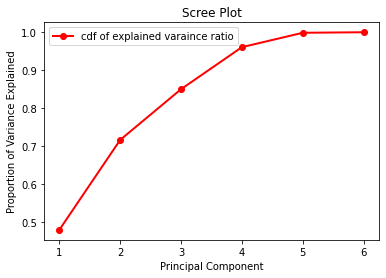

In [68]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, np.cumsum(pca.explained_variance_ratio_), 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.legend(['cdf of explained varaince ratio'])
plt.show()

By using scree plot the optimal number of principal_components was selected as 6 because at the optimal pc's the slope of the curve does not change much

or 

we can select optimal number of pc's by using variance explained in % wise as we see the first 3 pc's cumulatively produces a total of 80 % variance of the data



In [41]:
from sklearn.decomposition import PCA

pca = PCA(6)
X_pca = pca.fit_transform(df_new)
X_pca.shape

(59400, 6)

In [42]:
df_pca = pd.DataFrame(X_pca[:,0:6], columns=['pc1','pc2','pc3','pc4','pc5','pc6'])
print (df_pca)

            pc1       pc2       pc3       pc4       pc5       pc6
0      0.302428 -0.149454 -0.112654  0.053694  0.023455 -0.002983
1     -0.259078  0.098720  0.089537 -0.089393 -0.074571 -0.000415
2     -0.103201  0.061708  0.090614 -0.104855 -0.062176 -0.001224
3      0.783903  0.763646 -0.124732 -0.229952  0.245863 -0.010157
4     -0.320841  0.104137  0.038075 -0.038669 -0.064824 -0.003333
...         ...       ...       ...       ...       ...       ...
59395 -0.197638 -0.065259  0.120420 -0.085205  0.037897 -0.003614
59396  0.243827 -0.137307 -0.085808  0.037323  0.009513 -0.005013
59397  0.219019 -0.098172 -0.096926  0.040719  0.039848 -0.001022
59398  0.018121 -0.156674  0.010836 -0.004564  0.049986 -0.000788
59399  0.071503 -0.155932  0.033797 -0.031656  0.002332 -0.002338

[59400 rows x 6 columns]


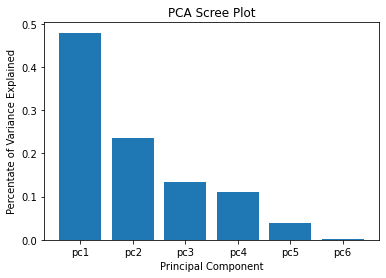

In [70]:
#https://www.kindsonthegenius.com/principal-components-analysispca-in-python-step-by-step/
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = ['pc1','pc2','pc3','pc4','pc5','pc6']
plt.bar(x= range(1,7), height=pca.explained_variance_ratio_, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

Text(0, 0.5, 'PC2')

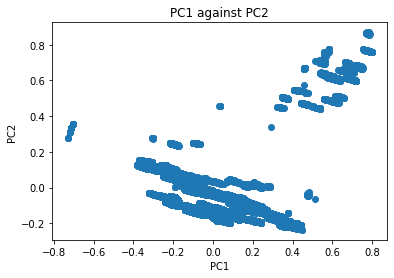

In [44]:
plt.scatter(df_pca.pc1, df_pca.pc2)
plt.title('PC1 against PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')

In [45]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le=le.fit(df.status_group)
#list(le.classes_)
y1=le.transform(df.status_group)

Text(0, 0.5, 'Second principle component')

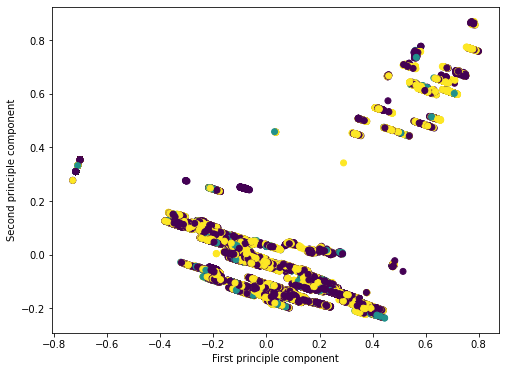

In [46]:
plt.figure(figsize=(8,6))
plt.scatter(df_pca.pc1,df_pca.pc2,c=y1)
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

as we see from above plot the pc's dose not provide any information about the clusters form in the plot since they are highly overlapped with each other

In [47]:
#df=df.join(df_pca)

In [48]:
#df.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group', 'pc1', 'pc2', 'pc3', 'pc4',
       'pc5', 'pc6'],
      dtype='object')

In [49]:
#https://towardsdatascience.com/how-to-select-the-best-number-of-principal-components-for-the-dataset-287e64b14c6d
#https://www.datasklr.com/principal-component-analysis-and-factor-analysis/principal-component-analysis********************

#import numpy as np
#import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

df_test.gps_height=df.gps_height.where(df.gps_height< 0, df.gps_height.mean())
df_test.population=df.population.replace(0,df.population.mean())
df_test.amount_tsh=df.amount_tsh.replace(0,df.amount_tsh.median())

df_new1=df_test[['amount_tsh','gps_height','longitude','latitude','region_code','district_code','population']]
df_new1.gps_height = preprocessing.MinMaxScaler().fit_transform(df_new1.gps_height.values.reshape(-1,1))#standardize the values of differntmetrics in [0,1]



df_new1.amount_tsh = preprocessing.MinMaxScaler().fit_transform(df_new1.amount_tsh.values.reshape(-1,1))

df_new1.longitude = preprocessing.MinMaxScaler().fit_transform(df_new1.longitude.values.reshape(-1,1))

df_new1.latitude = preprocessing.MinMaxScaler().fit_transform(df_new1.latitude.values.reshape(-1,1))



df_new1.region_code = preprocessing.MinMaxScaler().fit_transform(df_new1.region_code.values.reshape(-1,1))
 
df_new1.district_code = preprocessing.MinMaxScaler().fit_transform(df_new1.district_code.values.reshape(-1,1))


df_new1.population = preprocessing.MinMaxScaler().fit_transform(df_new1.population.values.reshape(-1,1))

df_test["construction_year"]= pd.to_datetime(df_test['construction_year'])
df_test["date_recorded"]= pd.to_datetime(df_test['date_recorded'])

from datetime import datetime


duration =   df_test["date_recorded"]-df_test["construction_year"]                      # For build-in functions
df_new1.duration=duration.astype('timedelta64[D]')
df_new1.duration=np.array(df_new1.duration).reshape(-1,1)



#plt.figure(figsize=(8,6))
#plt.scatter(x_pca[:,0],x_pca[:,1],c=y)
#plt.xlabel('First principle component')
#plt.ylabel('Second principle component')

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [50]:
pca1=PCA(n_components=6)
pca1.fit(df_new1)
x_pca1=pca.transform(df_new1)
x_pca1.shape

(14850, 6)

In [51]:
df_pca_test = pd.DataFrame(x_pca1[:,0:6], columns=['pc1','pc2','pc3','pc4','pc5','pc6'])
print (df_pca_test)

            pc1       pc2       pc3       pc4       pc5       pc6
0     -0.103134  0.061350  0.045005 -0.066851 -0.065320 -0.001981
1     -0.205246 -0.088953  0.108424 -0.068284  0.012265  0.010587
2     -0.061213 -0.030219  0.016418 -0.027454 -0.031877  0.008108
3      0.582531  0.615953 -0.089368 -0.192712  0.077032 -0.008526
4      0.384006 -0.197732 -0.144758  0.079802  0.009842  0.005314
...         ...       ...       ...       ...       ...       ...
14845  0.069817 -0.154430  0.048659 -0.044051 -0.016269  0.004240
14846 -0.027523 -0.100170  0.065820 -0.057086  0.059372  0.004498
14847 -0.093119 -0.019793  0.027820 -0.034626 -0.032861 -0.004411
14848  0.357647 -0.196467 -0.127689  0.069337 -0.003279 -0.000075
14849  0.402847 -0.203241 -0.156775  0.088280  0.011385  0.005432

[14850 rows x 6 columns]


In [52]:
df_test=df_test.join(df_pca_test)

In [53]:
df_test.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6'],
      dtype='object')

# 3Vectorization

# form a new feature by combining longitude and latitude into one feature called harvesine_distance

In [10]:
from math import radians, cos, sin, asin, sqrt
from sklearn import preprocessing
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
#https://datascience.stackexchange.com/questions/49553/combining-latitude-longitude-position-into-single-feature?rq=1

def single_pt_haversine(lat, lng, degrees=True):
    """
    'Single-point' Haversine: Calculates the great circle distance
    between a point on Earth and the (0, 0) lat-long coordinate
    """
    r = 6371 # Earth's radius (km). Have r = 3956 if you want miles

    # Convert decimal degrees to radians
    if degrees:
        lat, lng = map(radians, [lat, lng])

    # 'Single-point' Haversine formula
    a = sin(lat/2)**2 + cos(lat) * sin(lng/2)**2
    d = 2 * r * asin(sqrt(a)) 

    return d

df['harvesine_distance'] = [single_pt_haversine(x, y) for x, y in zip(df.latitude, df.longitude)]
df_test['harvesine_distance'] = [single_pt_haversine(x, y) for x, y in zip(df_test.latitude, df_test.longitude)]


In [14]:
  #df_test.population=df.population.replace(0,df_test.population.mean())
  #https://stackoverflow.com/questions/17097236/replace-invalid-values-with-none-in-pandas-dataframe
  df_test.gps_height=df.gps_height.where(df.gps_height< 0, df.gps_height.mean())
  df_test.population=df.population.replace(0,df.population.mean())
  #df['funder']=df['funder'].replace(np.nan,df['funder'].mode)
  df_test['funder'] = df_test['funder'].fillna('unknown')
  df_test['installer']=df_test['installer'].fillna('unknown')
  df_test['subvillage']=df_test['subvillage'].fillna('unknown')
  df_test['public_meeting']=df_test['public_meeting'].fillna('unknown')
  df_test['scheme_management']=df_test['scheme_management'].fillna('unknown')
  df_test.amount_tsh=df.amount_tsh.replace(0,df.amount_tsh.median())


Replace nan values with unknown,mean,median

In [17]:
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
def prepare_data(df,df_test):
  #df=df.dropna()
  #df.gps_height=df.gps_height.replace(0,df.gps_height.median())
  df.gps_height=df.gps_height.where(df.gps_height< 0, df.gps_height.mean())
  df.population=df.population.replace(0,df.population.mean())
  #df['funder']=df['funder'].replace(np.nan,df['funder'].mode.values[0])
  df['funder'] = df['funder'].fillna('unknown')
  df['installer']=df['installer'].fillna('unknown')
  df['subvillage']=df['subvillage'].fillna('unknown')
  df['public_meeting']=df['public_meeting'].fillna('unknown')
  df['scheme_management']=df['scheme_management'].fillna('unknown')
  df.amount_tsh=df.amount_tsh.replace(0,df.amount_tsh.median())
  X=df.drop(['status_group'],axis=1)
  y=df.status_group
  from sklearn.model_selection import train_test_split
  #split the data into train test by using stratified sampling technique
  X_train, X_cv, y_train, y_cv= train_test_split(X, y,stratify=y,test_size=0.10,random_state=42)
  #X_train, X_test, y_train= X,df_test,y
  X_test=df_test
  from sklearn import preprocessing
  le = preprocessing.LabelEncoder()
  le=le.fit(df.status_group)
  #list(le.classes_)
  y_train=le.transform(y_train)
  y_cv=le.transform(y_cv)
  

  # We are considering only the words which appeared in at least 5 documents(rows or projects)
  #below code shows vectorization through one hot encoding
  def dummy_enc(df,feature):
    #df[feature] = df[feature].fillna("Unknown")
    vectorizer = CountVectorizer(min_df=5)
    train = vectorizer.fit_transform(X_train[feature])
    test = vectorizer.transform(X_test[feature])
    cv=  vectorizer.transform(X_cv[feature])
    return train,test,cv
  
  #X_train['funder'] = X_train['funder'].fillna("Unknown")
  #X_test['funder'] = X_test['funder'].fillna("Unknown")
  funder_ohe_train,funder_ohe_test,funder_ohe_cv=dummy_enc(X_train,'funder')
 
  #X_train['installer'],X_test['installer'] = X_train['installer'].fillna("Unknown"),X_test['installer'].fillna("Unknown")
  installer_ohe_train,installer_ohe_test,installer_ohe_cv=dummy_enc(X_train,'installer')
  
  #
  wpt_name_ohe_train,wpt_name_ohe_test,wpt_name_ohe_cv=dummy_enc(X_train,'wpt_name')

  basin_dummy_ohe_train,basin_dummy_ohe_test,basin_dummy_ohe_cv = dummy_enc(X_train,'basin') 
  
  subvillage_ohe_train,subvillage_ohe_test,subvillage_ohe_cv = dummy_enc(X_train,'subvillage')

  region_ohe_train,region_ohe_test,region_ohe_cv = dummy_enc(X_train,'region') 

  lga_ohe_train,lga_ohe_test,lga_ohe_cv = dummy_enc(X_train,'lga')

  ward_ohe_train,ward_ohe_test,ward_ohe_cv = dummy_enc(X_train,'ward')
 
  #public_meeting_ohe_train,public_meeting_ohe_test = dummy_enc(X_train,'public_meeting')

  scheme_management_ohe_train,scheme_management_ohe_test,scheme_management_ohe_cv=dummy_enc(X_train,'scheme_management')

  #scheme_name_ohe_train,scheme_name_ohe_test = dummy_enc(X_train,'scheme_name') #47% null values

  extraction_type_ohe_train,extraction_type_ohe_test,extraction_type_ohe_cv= dummy_enc(X_train,'extraction_type')  

  management_group_ohe_train,management_group_ohe_test,management_group_ohe_cv = dummy_enc(X_train,'management_group')
  payment_type_ohe_train,payment_type_ohe_test,payment_type_ohe_cv = dummy_enc(X_train,'payment_type')

  water_quality_ohe_train,water_quality_ohe_test,water_quality_ohe_cv = dummy_enc(X_train,'water_quality')

  quantity_ohe_train,quantity_ohe_test,quantity_ohe_cv = dummy_enc(X_train,'quantity')

  source_ohe_train,source_ohe_test,source_ohe_cv = dummy_enc(X_train,'source')

  source_class_ohe_train,source_class_ohe_test,source_class_ohe_cv= dummy_enc(X_train,'source_class')

  waterpoint_type_ohe_train,waterpoint_type_ohe_test,waterpoint_type_ohe_cv = dummy_enc(X_train,'waterpoint_type')

  #numerical features
  #standardize numerical features
  df.gps_height=df.gps_height.replace(0,df.construction_year.median())
  ##https://stackoverflow.com/questions/53723928/attributeerror-series-object-has-no-attribute-reshape
  gps_height_train=X_train['gps_height'].values.reshape(-1,1) #reshape the column
  gps_height_test=X_test['gps_height'].values.reshape(-1,1)
  gps_height_cv=X_cv['gps_height'].values.reshape(-1,1)
  gps_height_train = preprocessing.MinMaxScaler().fit_transform(gps_height_train)#standardize the values of differntmetrics in [0,1]
  gps_height_test  = preprocessing.MinMaxScaler().fit_transform(gps_height_test)
  gps_height_cv  = preprocessing.MinMaxScaler().fit_transform(gps_height_cv)

  amount_tsh_train=X_train['amount_tsh'].values.reshape(-1,1)
  amount_tsh_test=X_test['amount_tsh'].values.reshape(-1,1)
  amount_tsh_cv=X_cv['amount_tsh'].values.reshape(-1,1)
  amount_tsh_train = preprocessing.MinMaxScaler().fit_transform(amount_tsh_train)
  amount_tsh_test  = preprocessing.MinMaxScaler().fit_transform(amount_tsh_test)
  amount_tsh_cv  = preprocessing.MinMaxScaler().fit_transform(amount_tsh_cv)

  harvesine_distance_train=X_train['harvesine_distance'].values.reshape(-1,1)
  harvesine_distance_test=X_test['harvesine_distance'].values.reshape(-1,1)
  harvesine_distance_cv=X_cv['harvesine_distance'].values.reshape(-1,1)
  harvesine_distance_train = preprocessing.MinMaxScaler().fit_transform(harvesine_distance_train)
  harvesine_distance_test  = preprocessing.MinMaxScaler().fit_transform(harvesine_distance_test)
  harvesine_distance_cv  = preprocessing.MinMaxScaler().fit_transform(harvesine_distance_cv)

  region_code_train=X_train['region_code'].values.reshape(-1,1)
  region_code_test=X_test['region_code'].values.reshape(-1,1)
  region_code_cv=X_cv['region_code'].values.reshape(-1,1)
  region_code_train = preprocessing.MinMaxScaler().fit_transform(region_code_train)
  region_code_test  = preprocessing.MinMaxScaler().fit_transform(region_code_test)
  region_code_cv = preprocessing.MinMaxScaler().fit_transform(region_code_cv)
  region_code_train.shape,region_code_test.shape

  population_train=X_train['population'].values.reshape(-1,1)
  population_test=X_test['population'].values.reshape(-1,1)
  population_cv=X_cv['population'].values.reshape(-1,1)
  population_train = preprocessing.MinMaxScaler().fit_transform(population_train)
  population_test  = preprocessing.MinMaxScaler().fit_transform(population_test)
  population_cv  = preprocessing.MinMaxScaler().fit_transform(population_cv)
  population_train.shape,population_test.shape

  #pca_train=X_train.pca
  #pca_cv=X_cv.pca
  #pca_test=X_test.pca
  #X_train.pc1=X_train['pc1'].values.reshape(-1,1)
  #X_cv.pc1=X_cv['pc1'].values.reshape(-1,1)
  #X_test.pc1=X_test['pc1'].values.reshape(-1,1)

  #stacking features horizontally by hstack into a sparse matrix 
  train=hstack((funder_ohe_train, installer_ohe_train,wpt_name_ohe_train,basin_dummy_ohe_train,
              subvillage_ohe_train,region_ohe_train,lga_ohe_train,ward_ohe_train,
              scheme_management_ohe_train,extraction_type_ohe_train,
            management_group_ohe_train,payment_type_ohe_train,water_quality_ohe_train,
            water_quality_ohe_train,quantity_ohe_train,source_ohe_train,
            source_class_ohe_train,source_class_ohe_train,waterpoint_type_ohe_train,harvesine_distance_train)).tocsr() 

  test=hstack((funder_ohe_test, installer_ohe_test,wpt_name_ohe_test,basin_dummy_ohe_test,
              subvillage_ohe_test,region_ohe_test,lga_ohe_test,ward_ohe_test,
              scheme_management_ohe_test,extraction_type_ohe_test,
            management_group_ohe_test,payment_type_ohe_test,water_quality_ohe_test,
            water_quality_ohe_test,quantity_ohe_test,source_ohe_test,
            source_class_ohe_test,source_class_ohe_test,waterpoint_type_ohe_test,
            harvesine_distance_test)).tocsr()  

  cv= hstack((funder_ohe_cv, installer_ohe_cv,wpt_name_ohe_cv,basin_dummy_ohe_cv,
              subvillage_ohe_cv,region_ohe_cv,lga_ohe_cv,ward_ohe_cv,
              scheme_management_ohe_cv,extraction_type_ohe_cv,
            management_group_ohe_cv,payment_type_ohe_cv,water_quality_ohe_cv,
            water_quality_ohe_cv,quantity_ohe_cv,source_ohe_cv,
            source_class_ohe_cv,source_class_ohe_cv,waterpoint_type_ohe_cv,
            harvesine_distance_cv
           )).tocsr()             
  
  return train,test,cv,y_train,y_cv      

In [18]:
from scipy.sparse import hstack
train1,test1,cv1,y1_train,y1_cv=prepare_data(df,df_test)
train1.shape,y1_train.shape,cv1.shape,test1.shape

((53460, 7732), (53460,), (5940, 7732), (14850, 7732))

# **Inferences:**

###1)spearman rank correlation coefficient technique used for select the high correlated features with a threshold value of 0.6 

###2)Manually select the features with high commanlity and remove those features which are highly correlated categorical features like  quantity and quantity_group,(source_type, source feature),(extraction_type_group and extraction_type_group),(waterpoint type group and water point type)

###3)scheme name has almost 47 % of null values hence its recommended to remove the feature

###4)form a new feature by combining longitude and latitude into one feature called harvesine_distance and studied the impact on the model

###5)One-hot-encoding used to encode the categorical variables by using count-vectorizer with minimum data frequency of 5 times the sub-category should appear in the dataframe

###6)Split the data into train_test split with stratify sampling technique to equally distribute the proprtions of data among train test data

###7)Frequency encoding techniques were tested but a significant drop in model performance was noticed

###8)standaradization techniques performed on numerical variables to keep them in the same scales which are having different units

###9)label encoder  was performed on target class labels

###10)Replace the missing values of numerical variables with mean or median and categorical variables as unknown quantity

###11)After ohe all features were stacked through horizontal stacking to hold the information in sparse matrix since most of the values are 0

###12)By using scree plot the optimal number of principal_components was selected as 6 because at the optimal pc's the slope of the curve does not change much  or

###we can select optimal number of pc's by using variance explained in % wise as we see the first 3 pc's cumulatively produces a total of 80 % variance of the data

###as we see from above plot the pc's dose not provide any information about the clusters form in the plot since they are highly overlapped with each other

###13)by using forward feature selection and mutual_info feature selection we drop 4 features which were not impacted by model